In [59]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# https://seaborn.pydata.org/index.html

### Imprter les bases de données

In [27]:
titanic_train = pd.read_csv("D:/semaine15/train.csv")

In [23]:
titanic_train.head(15)

0     0
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    1
12    0
13    0
14    1
Name: Sex, dtype: int64

In [60]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 83.3+ KB


In [61]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
titanic_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",0,32.000000,0,0,370376,7.75,Q


In [63]:
titanic_train.shape

(889, 11)

### Cleaning de la base 

In [66]:
# Vérifier les doublons dans la table
trainn = titanic_train.drop_duplicates()
doublons = titanic_train.shape[0] - trainn.shape[0]
doublons_pct = doublons/titanic_train.shape[0]*100
print("Il y a", doublons, ", soit", round(doublons_pct, 4), "% de doublons dans la table Train.")

Il y a 0 , soit 0.0 % de doublons dans la table Train.


In [68]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [71]:
del titanic_train["Cabin"]

In [29]:
titanic_train["Age"].fillna(titanic_train["Age"].mean(), inplace = True)

In [30]:
titanic_train.dropna(inplace = True)

In [72]:
titanic_train.isnull().sum()

In [16]:
titanic_train.shape

(889, 11)

In [17]:
#enregistrer la nouvelle base dans un autre emplacement
titanic_train.to_csv('D:/semaine15/train_clean.csv')

In [57]:
titanic_train.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,430.932692,0.740385,2.166667,28.077094,0.698718,0.653846,44.252124
male,454.147314,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


#### On constate que la moyenne d'age des femmes est de 28 ans, celle des hommes de 30 ans

In [60]:
titanic_train['Pclass'].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

#### Il y'a beaucoup plus de passagers dans la troisième classe que dans les deux autres.

## Visualisation des données

Text(0.5, 1.0, 'Le nombre de passagers de chaque classe')

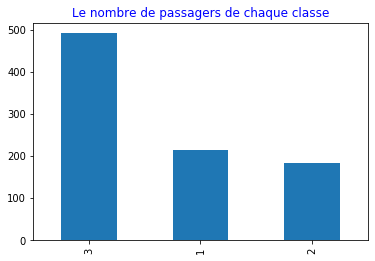

In [68]:
titanic_train['Pclass'].value_counts().plot.bar()
plt.title ('Le nombre de passagers de chaque classe', color = 'blue')

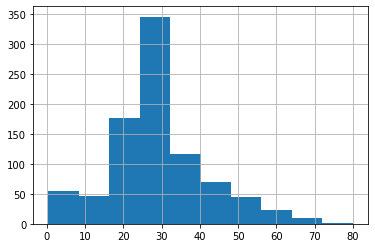

In [75]:
titanic_train['Age'].hist()

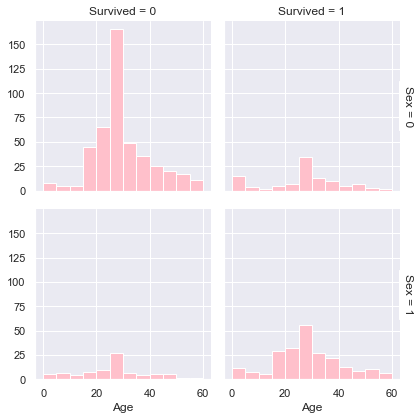

In [78]:
import seaborn as sns
sns.set(style="darkgrid")
g = sns.FacetGrid(titanic_train, row="Sex", col="Survived", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "Age", color="pink", bins=bins)


#### On constate qu'il y'a plus de femmes et d'enfants survivants que d'hommes

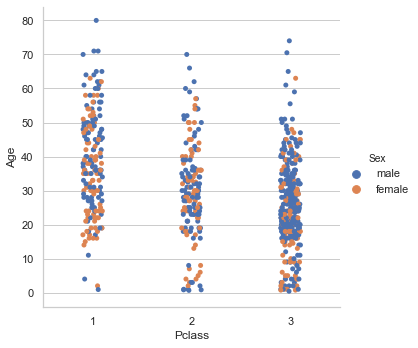

In [190]:
#Nuage de point catégoriel
sns.catplot(x="Pclass", y="Age", data=titanic_train, hue = "Sex")

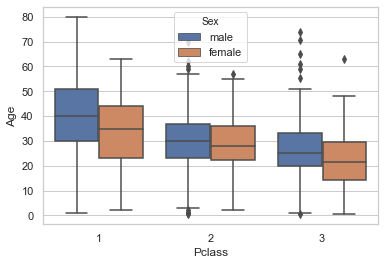

In [191]:
sns.boxplot(x="Pclass", y="Age", data=titanic_train, hue = "Sex")

In [ ]:
nous remarquons que dans la 2eme te troisieme classe nous avons de bébé et des vieux hommes

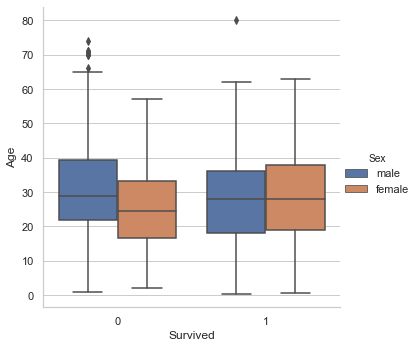

In [183]:
sns.catplot(x="Survived", y="Age", kind="box",hue ="Sex", data=titanic_train);

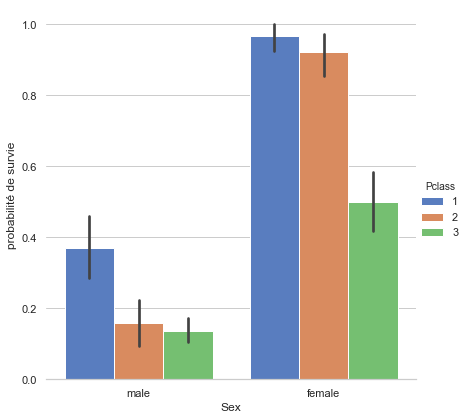

In [184]:
# tracer le graphe des probabilité de survie par rapport à la classe
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Sex", y="Survived", hue="Pclass", data=titanic_train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("probabilité de survie ")

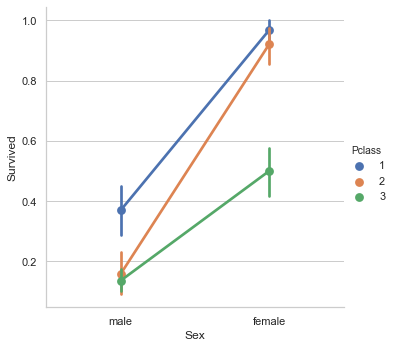

In [185]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", data=titanic_train);

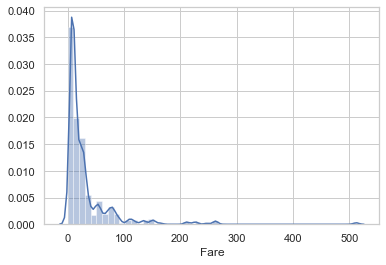

In [192]:
# La distribution du prix du billet
sns.distplot(titanic_train['Fare'])

In [76]:
titanic_train.groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.717391  0.967391  33.796653  0.565217  0.467391   
       2        443.105263  0.921053  28.748661  0.486842  0.605263   
       3        399.729167  0.500000  24.068493  0.895833  0.798611   
male   1        455.729508  0.368852  39.287717  0.311475  0.278689   
       2        447.962963  0.157407  30.653908  0.342593  0.222222   
       3        455.515850  0.135447  27.372153  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.693750  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

In [79]:
# # Pour avoir les 5 premiere valeurs de la colonne age
# titanic_train.loc[0:4,'Age']

In [80]:
# #Pour avoir les 3 colonne de la table
# titanic_train.iloc[:,0:3]

In [81]:
# # avoir les 11 première valeurs de la colonne age
# titanic_train['Age'][0:10]

In [96]:
# Le nombre de mineurs sur le bateau
titanic_train[titanic_train['Age']<18].groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        26.241667  
       3        18.727977  
male   1       116.072900  
       2        25.659473  
       3        22.752523

In [84]:
# titanic_train.loc[titanic_train['Age'] <= 20, 'Age']= 0
# titanic_train.loc[(titanic_train['Age'] > 20) & titanic_train['Age'] <= 30, 'Age']= 1
# titanic_train.loc[(titanic_train['Age'] >30) &(titanic_train['Age']) <= 40, 'Age']= 2
# titanic_train.loc[titanic_train['Age'] > 40, 'Age']= 3

In [11]:
# FOnction qui retourne la catégorie d'age 
def category_ages(age):
    if age <= 18:
        return'Enfant'
    elif( age >18 ) & (age <= 30):
        return '20-30 ans'
    elif(age>30) & (age < 40):
        return '30-40 ans'
    else:
        return '+ 40 ans'
    
titanic_train['Age'].map(category_ages)    

0      20-30 ans
1      30-40 ans
2      20-30 ans
3      30-40 ans
4      30-40 ans
         ...    
886    20-30 ans
887     < 20 ans
888    20-30 ans
889    20-30 ans
890    30-40 ans
Name: Age, Length: 889, dtype: object

In [25]:
V = titanic_train.Survived.groupby(titanic_train.Sex).value_counts()
V

Sex     Survived
female  1           231
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

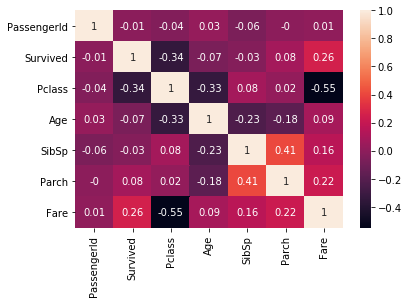

In [26]:
matrice_corr = titanic_train.corr().round(2)
sns.heatmap(data=matrice_corr, annot=True)

## Creer un modèle de regression linéaire survived par rapport à l'age

In [36]:
#tracer le scatter plot de survived et l'âge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


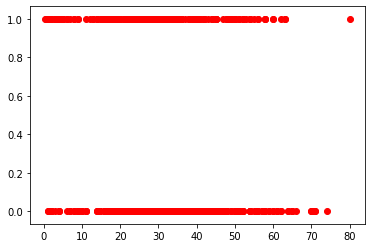

In [28]:
Y =titanic_train["Survived"]
X = titanic_train["Age"]

plt.scatter(X,Y, c = 'red')

In [30]:
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size = 0.25, random_state = 5 ) 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(666,)
(223,)
(666,)
(223,)


In [31]:
modele1 = LinearRegression()
modele1.fit(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1))


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Evaluation du modèle

In [32]:
y_pred = modele1.predict(X_test.values.reshape(-1,1))
print(y_pred.shape)


(223, 1)


In [33]:
erreur = (np.sqrt((mean_squared_error(Y_test, y_pred))))
r2 = r2_score(Y_test,y_pred)

print('La performance du modèle1 sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(erreur))
print('le score R2 est {}'.format(r2))
print('\n')


La performance du modèle1 sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 0.4791887501010191
le score R2 est -0.028726611494622745




#### nous remarquons que l'errer quadratique moyenne entre le y et y_pred est significative, donc il ne y'a pas de relation linéaire entre les survivant et l'age et le R² le confirme. R² = -0.03 pas corrélé

#### Modèle de régression linéaire pour survived et Pclass

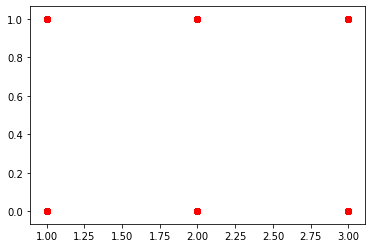

In [34]:
Y = titanic_train["Survived"]
X = titanic_train["Pclass"]
plt.scatter(X,Y, c = 'red')



In [35]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size = 0.2, random_state = 5 ) 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(711,)
(178,)
(711,)
(178,)


In [36]:
modele2 = LinearRegression()
modele2.fit(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1))

y_pred = modele2.predict(X_test.values.reshape(-1,1))
print(y_pred.shape)

(178, 1)


## Evaluation du modèle

In [37]:
erreur = (np.sqrt((mean_squared_error(Y_test, y_pred))))
r2 = r2_score(Y_test,y_pred)

print('La performance du modèle2 sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(erreur))
print('le score R2 est {}'.format(r2))
print('\n')


La performance du modèle2 sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 0.4472707224732681
le score R2 est 0.09721990792268076




#### on remarque là aussi que les srvivants et la classe des passager n'admette pas de relation lineaire

## Régression lineaire survived et FARE

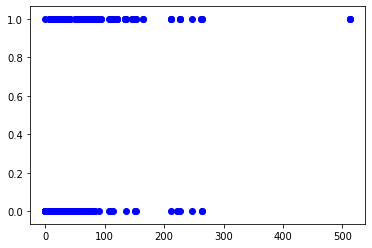

In [38]:
Y =titanic_train["Survived"]
X = titanic_train['Fare']

plt.scatter(X,Y, c='blue')

In [39]:
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size = 0.2, random_state = 5 ) 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(711,)
(178,)
(711,)
(178,)


In [40]:
modele3 = LinearRegression()
modele3.fit(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1))

y_pred = modele3.predict(X_test.values.reshape(-1,1))


## Evaluation du modèle3

In [41]:
erreur = (np.sqrt((mean_squared_error(Y_test, y_pred))))
r2 = r2_score(Y_test,y_pred)

print('La performance du modèle3 sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(erreur))
print('le score R2 est {}'.format(r2))
print('\n')


La performance du modèle3 sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 0.46717139896906024
le score R2 est 0.015096853466737614




#### Pas de corrélation entre les survivants et le prix de leur billet

## Modèle de régression linéaire survived et sexe

In [47]:
# #transformer la colonne genre en données numériques
#titanic_train["Sex"].map({'male':0, 'female':1})
# ou
titanic_train['Sex'].replace(['male', 'female'], [0,1], inplace =True)
# ou encore
#titanic_train['Sex'].astype('category').cat.codes

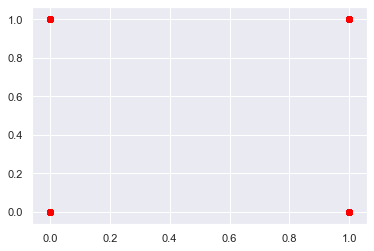

In [48]:
Y =titanic_train["Survived"]
X = titanic_train['Sex']

plt.scatter(X,Y, c='red')

In [49]:
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size = 0.25, random_state = 5 ) 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(666,)
(223,)
(666,)
(223,)


In [50]:
modele4 = LinearRegression()
modele4.fit(X_train.values.reshape(-1,1),Y_train.values.reshape(-1,1))

y_pred = modele4.predict(X_test.values.reshape(-1,1))

In [51]:
erreur = (np.sqrt((mean_squared_error(Y_test, y_pred))))
r2 = r2_score(Y_test,y_pred)

print('La performance du modèle3 sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(erreur))
print('le score R2 est {}'.format(r2))
print('\n')


La performance du modèle3 sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 0.3663336099547552
le score R2 est 0.3987705041361185




## Régression linéaire sur survived, age, class, fare


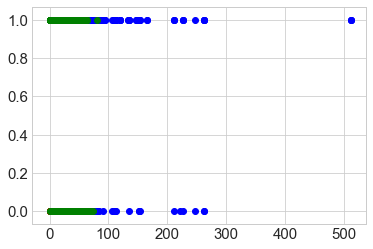

In [199]:
Y =titanic_train["Survived"]
X1 = titanic_train['Fare']
X2 = titanic_train['Pclass']
X3 = titanic_train['Age']
data = pd.DataFrame(X1,X2,X3)
plt.scatter(X1,Y, c='blue')
plt.scatter(X2,Y, c='red')
plt.scatter(X3,Y, c='green')


Text(0.5, 0, 'La classe')

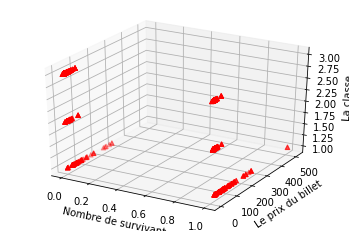

In [100]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(titanic_train["Survived"], titanic_train["Fare"], titanic_train["Pclass"], c='r', marker='^')
 
ax.set_xlabel('Nombre de survivant')
ax.set_ylabel('Le prix du billet')
ax.set_zlabel('La classe')
 

In [54]:
X = titanic_train[['Age','Pclass','Fare','Sex']]

In [55]:
Y = titanic_train['Survived']

In [56]:

modelM = LinearRegression(normalize=True)
modelM.fit(X,Y.values.reshape(-1,1))

y_pred = modelM.predict(X)


In [57]:
erreur = (np.sqrt((mean_squared_error(Y, y_pred))))
r2 = r2_score(Y,y_pred)

print('La performance du modèle3 sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(erreur))
print('le score R2 est {}'.format(r2))
print('\n')


La performance du modèle3 sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 0.3822229335193982
le score R2 est 0.38143442992328724


